In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten
import torch
import seaborn

In [2]:
# Define the paths for dataset
train = "C:/Users/hp/Documents/Mtech/GurNum/GurNum"
val = "C:/Users/hp/Documents/Mtech/GurNum/GurNum"

In [3]:
# Set the path to the folder containing the 'train' folder
train_dir = train
# Set the image size
img_size = (32, 32)

images = []
labels = []
# Load all classes
for label in range(10):
    folder_path = os.path.join(train_dir, 'train', str(label))
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
            
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
np.save('a_train.npy', images)
np.save('b_train.npy', labels)


In [4]:
# Set the path to the folder containing the 'val' folder
val_dir = val
# Set the image size
img_size_val = (32, 32)
images_val = []
labels_val = []
# Load all classes
for label in range(10):
    folder_path = os.path.join(val_dir, 'val\\', str(label))
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
np.save('a_test.npy', images_val)
np.save('b_test.npy', labels_val)

In [5]:
# Load the dataset
a_train = np.load('a_train.npy')
b_train = np.load('b_train.npy')
a_test = np.load('a_test.npy')
b_test = np.load('b_test.npy')

1000
178


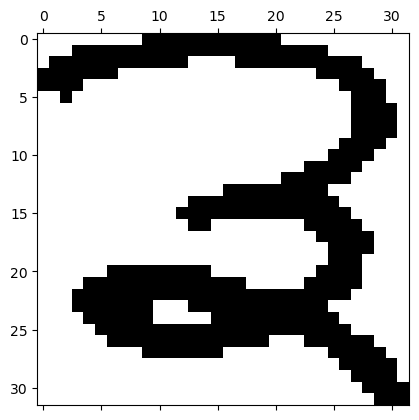

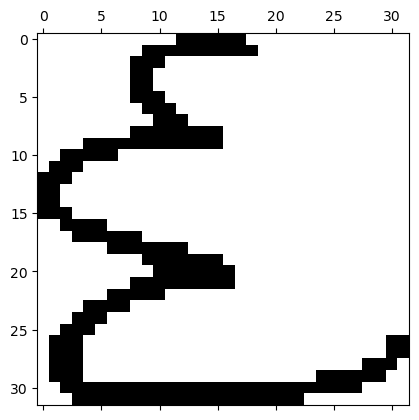

In [6]:
# test the images are loaded correctly
print(len(a_train))
print(len(a_test))
plt.matshow(a_train[340],cmap='gray')
plt.matshow(a_test[120],cmap='gray')

In [7]:
#Layer Model
model = keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')])

# compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# train the model for 20 iterations
model.fit(a_train, b_train,epochs= 20, validation_data=(a_test, b_test))

Epoch 1/20
32/32 [==============================] - 1s 14ms/step - loss: 139.6725 - accuracy: 0.3940 - val_loss: 78.1476 - val_accuracy: 0.5618
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 26.0686 - accuracy: 0.7970 - val_loss: 46.9033 - val_accuracy: 0.6798
Epoch 3/20
32/32 [==============================] - 0s 6ms/step - loss: 13.8108 - accuracy: 0.8660 - val_loss: 31.8458 - val_accuracy: 0.7135
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 7.8442 - accuracy: 0.9020 - val_loss: 15.2367 - val_accuracy: 0.8539
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 5.1346 - accuracy: 0.9390 - val_loss: 19.6078 - val_accuracy: 0.7809
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 3.8225 - accuracy: 0.9420 - val_loss: 20.1146 - val_accuracy: 0.8315
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 5.6841 - accuracy: 0.9370 - val_loss: 23.9743 - val_accuracy: 0.7865
Epoch 8/

In [8]:
a_train_scaled = a_train/255
a_test_scaled = a_test/255
model.fit(a_train_scaled, b_train,epochs= 10, validation_data=(a_test_scaled, b_test))

Epoch 1/10
32/32 [==============================] - 1s 12ms/step - loss: 0.6209 - accuracy: 0.9830 - val_loss: 0.9038 - val_accuracy: 0.8652
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6038 - accuracy: 0.9910 - val_loss: 0.8781 - val_accuracy: 0.8876
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5872 - accuracy: 0.9940 - val_loss: 0.8607 - val_accuracy: 0.8933
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5759 - accuracy: 0.9980 - val_loss: 0.8483 - val_accuracy: 0.9101
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5674 - accuracy: 1.0000 - val_loss: 0.8395 - val_accuracy: 0.9101
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5603 - accuracy: 1.0000 - val_loss: 0.8322 - val_accuracy: 0.9101
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5540 - accuracy: 1.0000 - val_loss: 0.8254 - val_accuracy: 0.9101
Epoch 8/10
32/32 [=

In [9]:
#Evaluate
model.evaluate(a_test_scaled,b_test)


6/6 [==============================] - 0s 6ms/step - loss: 0.8069 - accuracy: 0.9101


[0.8068931698799133, 0.9101123809814453]

6/6 [==============================] - 0s 6ms/step
Predicted Value is  0
Predicted Value is  2
Predicted Value is  3
Predicted Value is  7
Predicted Value is  5


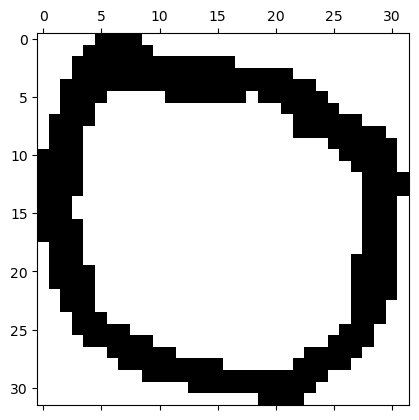

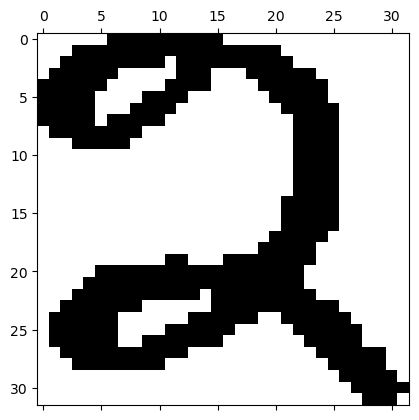

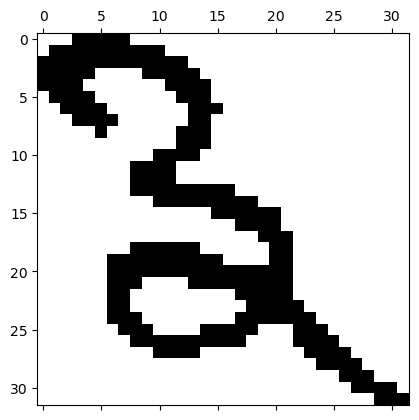

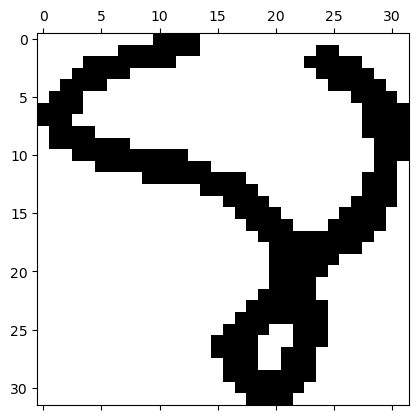

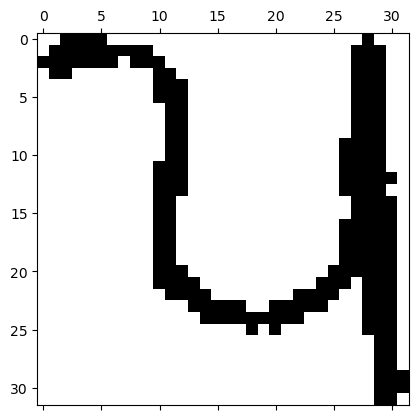

In [10]:
# predict
b_predicted = model.predict(a_test_scaled)

# take max of given 10 results
plt.matshow(a_test[0],cmap='gray')
print('Predicted Value is ',np.argmax(b_predicted[0]))
plt.matshow(a_test[40],cmap='gray')
print('Predicted Value is ',np.argmax(b_predicted[40]))
plt.matshow(a_test[60],cmap='gray')
print('Predicted Value is ',np.argmax(b_predicted[60]))
plt.matshow(a_test[80],cmap='gray')
print('Predicted Value is ',np.argmax(b_predicted[80]))
plt.matshow(a_test[100],cmap='gray')
print('Predicted Value is ',np.argmax(b_predicted[100]))

Text(95.72222222222221, 0.5, 'Actual')

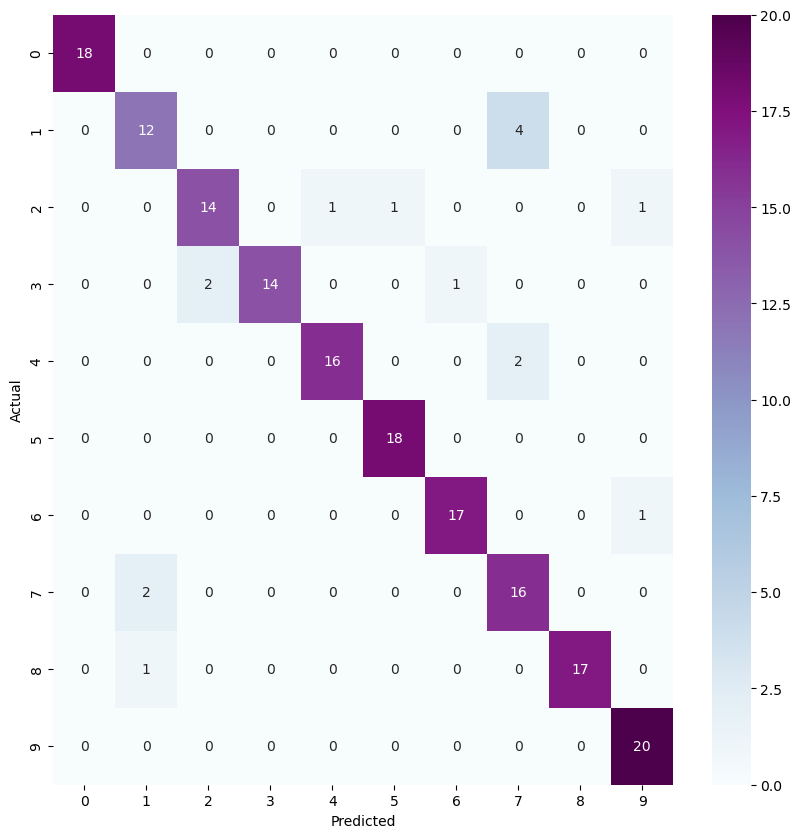

In [11]:
# Plot Confusion matrix
b_predicted_labels=[np.argmax(i) for i in b_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=b_test, predictions=b_predicted_labels)
plt.figure(figsize = (10,10))
seaborn.heatmap(confusion_matrix,annot=True,fmt='d',cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [12]:
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])

# compile the model
model2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
history = model2.fit(a_train_scaled, b_train,epochs= 20, validation_data=(a_test_scaled, b_test))

Epoch 1/20
32/32 [==============================] - 2s 34ms/step - loss: 1.2364 - accuracy: 0.6850 - val_loss: 0.3964 - val_accuracy: 0.8989
Epoch 2/20
32/32 [==============================] - 1s 25ms/step - loss: 0.1895 - accuracy: 0.9470 - val_loss: 0.3188 - val_accuracy: 0.9157
Epoch 3/20
32/32 [==============================] - 1s 26ms/step - loss: 0.1030 - accuracy: 0.9660 - val_loss: 0.3502 - val_accuracy: 0.8933
Epoch 4/20
32/32 [==============================] - 1s 27ms/step - loss: 0.0663 - accuracy: 0.9870 - val_loss: 0.2030 - val_accuracy: 0.9382
Epoch 5/20
32/32 [==============================] - 1s 26ms/step - loss: 0.0423 - accuracy: 0.9930 - val_loss: 0.2029 - val_accuracy: 0.9494
Epoch 6/20
32/32 [==============================] - 1s 26ms/step - loss: 0.0481 - accuracy: 0.9870 - val_loss: 0.1852 - val_accuracy: 0.9438
Epoch 7/20
32/32 [==============================] - 1s 26ms/step - loss: 0.0221 - accuracy: 0.9990 - val_loss: 0.2289 - val_accuracy: 0.9270
Epoch 8/20
32

In [13]:
# evaluate test dataset on modified model for loss and accuracy
model2.evaluate(a_test_scaled,b_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.1935 - accuracy: 0.9494


[0.19345079362392426, 0.949438214302063]

6/6 [==============================] - 0s 5ms/step


Text(95.72222222222221, 0.5, 'Actual')

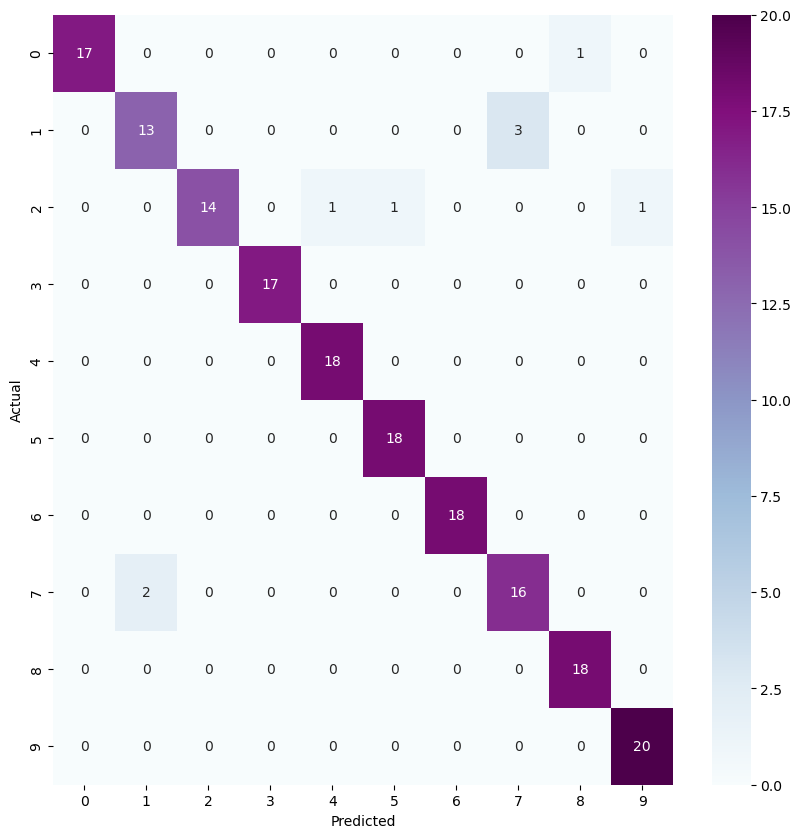

In [14]:
#confusion matrix
b_predicted = model2.predict(a_test_scaled)
b_predicted[0]
b_predicted_labels=[np.argmax(i) for i in b_predicted]
con_mat = tf.math.confusion_matrix(labels=b_test, predictions=b_predicted_labels)
plt.figure(figsize = (10,10))
seaborn.heatmap(con_mat,annot=True,fmt='d',cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 2ms/step - loss: 9.1669 - accuracy: 0.9101
Test accuracy: 0.9101123809814453


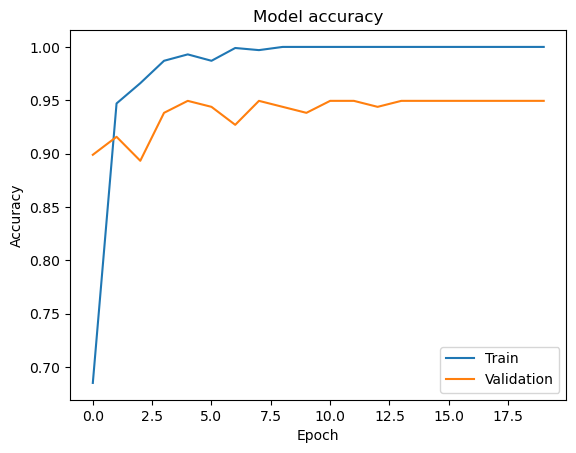

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(a_test, b_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()